In [1]:
import seaborn as sns
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
filename = '/home/tylerlum/Downloads/wandb_export_2022-12-10T19_11_04.755-08_00.csv'

In [2]:
df = pd.read_csv(filename)

In [3]:
df.head()

,joint_pos_0,joint_pos_1,joint_pos_2,joint_pos_3,joint_pos_4,joint_pos_5,joint_vel_0,joint_vel_1,joint_vel_2,joint_vel_3,...,tip_vel_y,tip_vel_z,target_pos_x,target_pos_y,target_pos_z,target_vel_x,target_vel_y,target_vel_z,smoothed_u_fpam,prev_u_rail_vel
0,-0.009622,-0.101274,0.017462,-0.211332,-0.026435,-0.076628,-0.295036,0.788693,0.008326,-0.100945,...,-0.009388,-0.067059,0,-0.277172,0.613471,0,0,0,2.475608,-0.250377
1,-0.013990,-0.115578,0.023582,-0.158287,-0.034574,-0.077434,-0.131109,-0.429308,0.183650,1.591967,...,0.106015,-0.090734,0,-0.277172,0.613471,0,0,0,2.475608,0.220796
2,-0.010827,-0.109039,0.024109,-0.159023,-0.036322,-0.077358,0.094952,0.196276,0.015827,-0.022085,...,0.170585,-0.015495,0,-0.277172,0.613471,0,0,0,2.475608,0.745709
3,-0.014727,-0.078065,0.025471,-0.159339,-0.042785,-0.078337,-0.117069,0.929587,0.040879,-0.009495,...,0.260801,-0.072971,0,-0.277172,0.613471,0,0,0,2.326460,-0.253271
4,-0.017293,-0.063450,0.027478,-0.133796,-0.042536,-0.078138,-0.077000,0.438619,0.060242,0.766616,...,0.333156,-0.086872,0,-0.277172,0.613471,0,0,0,2.326460,0.054515


In [4]:
num_data_columns = len(df.keys())
ncols = int(math.sqrt(num_data_columns))
nrows = math.ceil(num_data_columns / ncols)

<AxesSubplot:xlabel='joint_pos_0'>

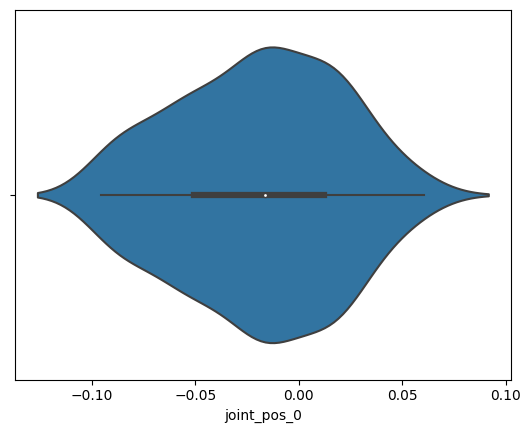

In [5]:
sns.violinplot(data=df, x="joint_pos_0")

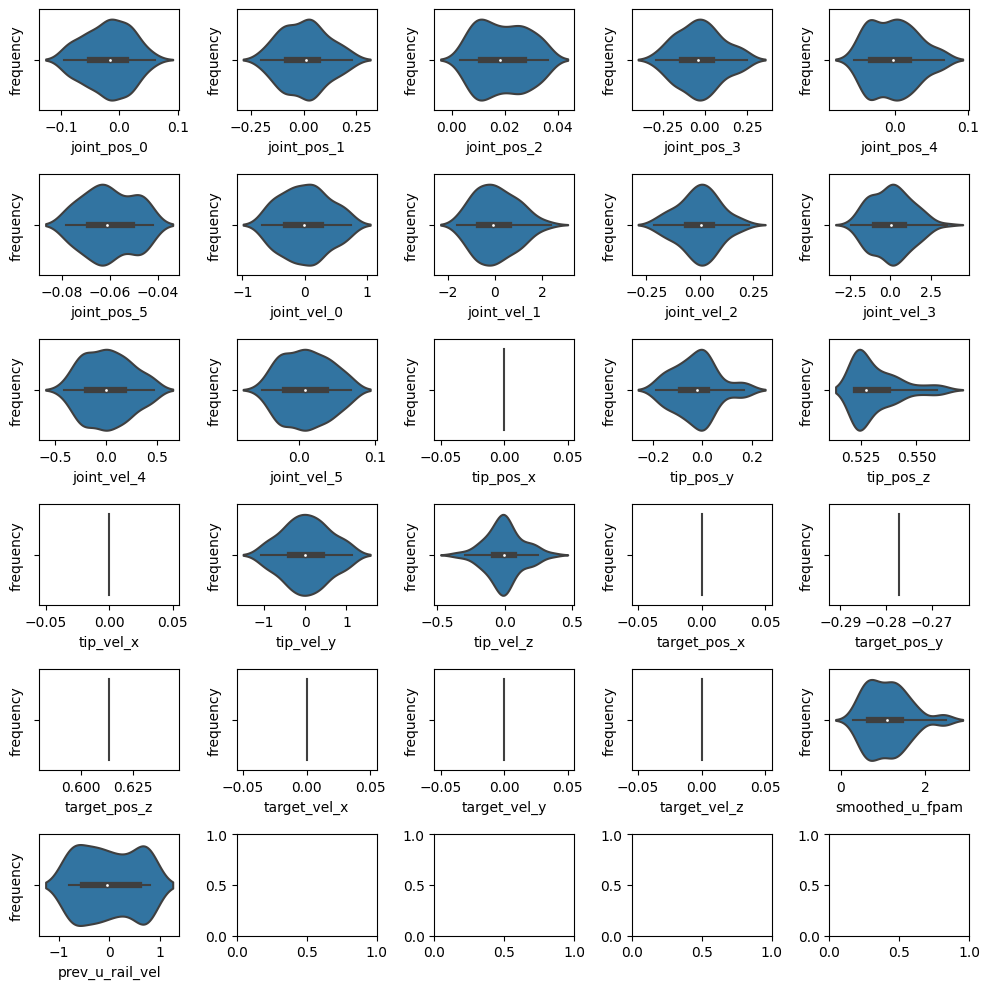

In [6]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
axes = axes.reshape(-1)
for i, (columnName, columnData) in enumerate(df.iteritems()):
    sns.violinplot(data=df, x=columnName, ax=axes[i])
    # axes[i].hist(columnData.values)
    axes[i].set_xlabel(columnName)
    axes[i].set_ylabel('frequency')
fig.tight_layout()

(array([10.,  4., 12.,  9., 13., 17., 11., 16.,  3.,  5.]),
 array([-0.09531772, -0.07971936, -0.064121  , -0.04852264, -0.03292428,
        -0.01732592, -0.00172755,  0.01387081,  0.02946917,  0.04506753,
         0.06066589]),
 <BarContainer object of 10 artists>)

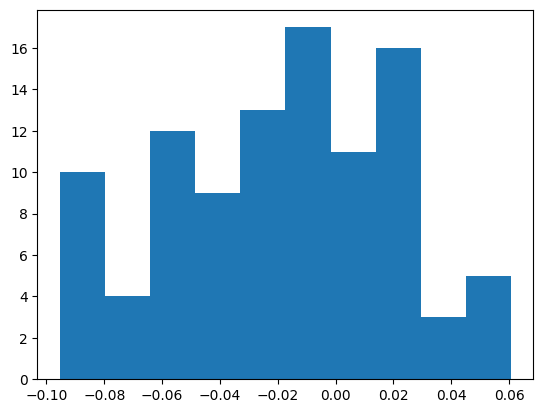

In [7]:
plt.hist(df["joint_pos_0"])

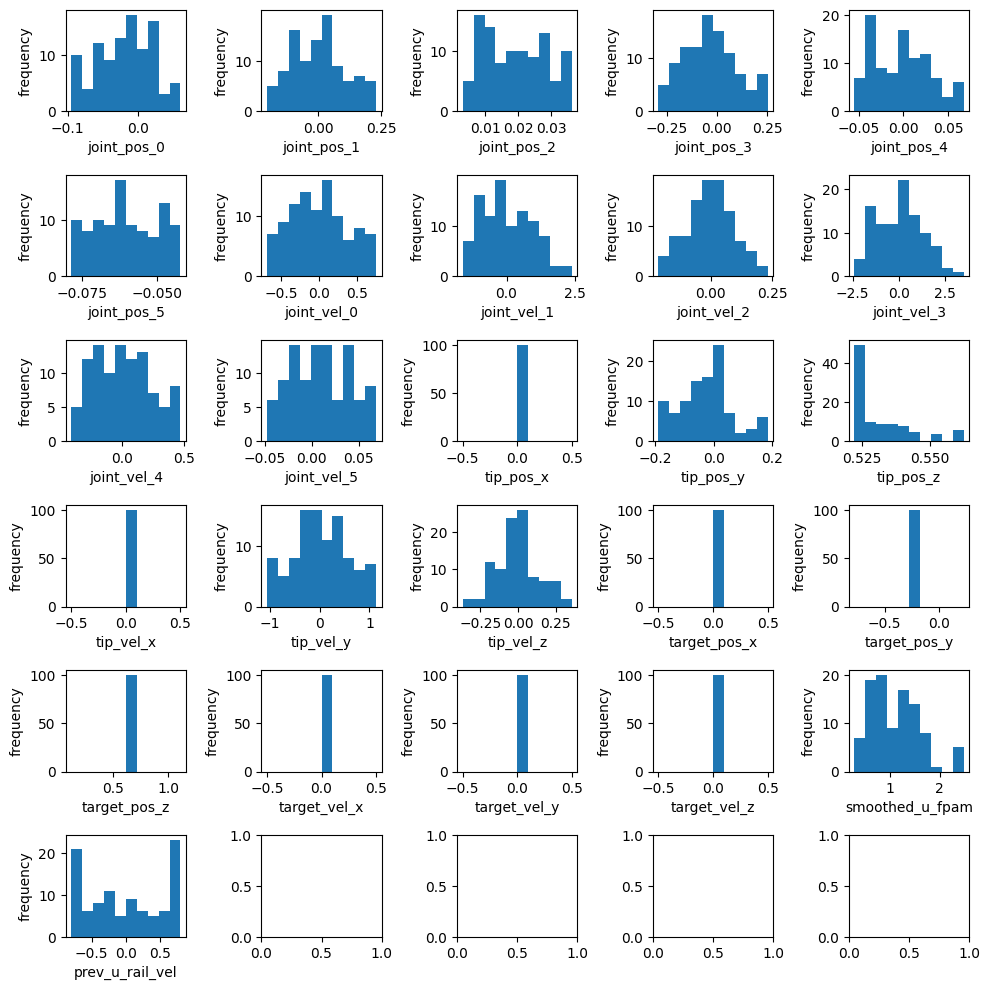

In [8]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
axes = axes.reshape(-1)
for i, (columnName, columnData) in enumerate(df.iteritems()):
    axes[i].hist(columnData.values)
    axes[i].set_xlabel(columnName)
    axes[i].set_ylabel('frequency')
fig.tight_layout()

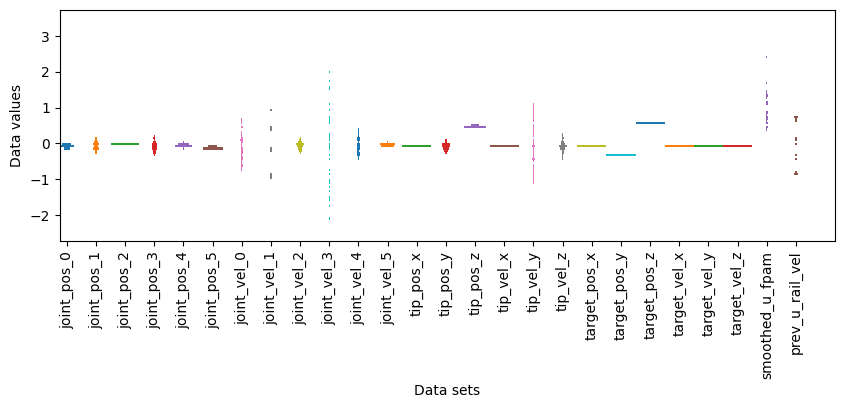

In [9]:
np.random.seed(19680801)
number_of_bins = 100

# An example of three data sets to compare
number_of_data_points = 387
# labels = ["A", "B", "C"]
# data_sets = [np.random.normal(0, 1, number_of_data_points),
#              np.random.normal(6, 1, number_of_data_points),
#              np.random.normal(-3, 1, number_of_data_points)]
labels, data_sets = [], []
for columnName, columnData in df.iteritems():
    labels.append(columnName)
    data_sets.append(columnData.values)

# Computed quantities to aid plotting
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
# x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))
x_locations = np.arange(0, np.max(binned_maximums) * binned_maximums.size, np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
centers = 0.5 * (bin_edges + np.roll(bin_edges, 1))[:-1]
heights = np.diff(bin_edges)

# Cycle through and plot each histogram
fig, ax = plt.subplots(figsize=(10, 3))
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations)
ax.set_xticklabels(labels, rotation=90)

ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()